# Ejercicios gestión de nulos

En este pair programming usaremos el csv que generamos en el pair programming de ayer. El objetivo del ejercicio es identificar las columnas que contienen valores nulos y aplicar un proceso de imputación para manejarlos de manera adecuada.

**Instrucciones:**

- Identificación de Valores Nulos: Identifica todas las columnas que contengan valores nulos en el DataFrame.

- Selección de Método de Imputación: Discute en tu compañera cuál sería la mejor estrategia para manejar los valores nulos en cada una de las columnas identificadas en el paso anterior.

- Imputación de Valores Nulos: Implementa el método de imputación seleccionado en el paso 2 para llenar los valores nulos en las columnas.

- Informe: Añade al final de un jupyter una explicación breve que describa las columnas que tenían valores nulos, cómo decidiste imputarlos y cualquier observación adicional que consideres importante sobre el proceso de limpieza de datos.

**Nota:** Puedes utilizar cualquier método o estrategia de imputación que consideres adecuado para los datos y discutir las ventajas y desventajas de tu elección en el informe.

In [1]:
#1.

import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [3]:
df_wd_total=pd.read_csv("data/df_world_data_total_apply.csv", index_col=0)
df_wd_total.head(5)

,density,abbreviation,agriculturalland,landarea,armedforcessize,birthrate,callingcode,capital/majorcity,co2-emissions,cpi,cpichange,currency-code,fertilityrate,forestedarea,gasolineprice,gdp,grossprimaryeducationenrollment,grosstertiaryeducationenrollment,infantmortality,largestcity,lifeexpectancy,maternalmortalityratio,minimumwage,officiallanguage,outofpockethealthexpenditure,physiciansperthousand,population,populationlaborforceparticipation,taxrevenue,totaltaxrate,unemploymentrate,urban_population,latitud,longitud,continent
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,60.0,AF,58.1,652230.0,323000.0,32.49,93.0,Kabul,8672.0,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,33.939110,67.709953,Asia
Albania,105.0,AL,43.1,28748.0,9000.0,11.78,355.0,Tirana,4536.0,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,41.153332,20.168331,Europe
Algeria,18.0,DZ,17.4,2381741.0,317000.0,24.28,213.0,Algiers,150006.0,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0,28.033886,1.659626,Africa
Andorra,164.0,AD,40.0,468.0,NaN,7.20,376.0,Andorra la Vella,469.0,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77142.0,NaN,NaN,NaN,NaN,67873.0,42.506285,1.521801,Europe
Angola,26.0,AO,47.5,1246700.0,117000.0,40.73,244.0,Luanda,34693.0,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0,-11.202692,17.873887,Africa


In [27]:
df_wd_total=df_wd_total.reset_index()

In [28]:
df_nulos=pd.DataFrame((df_wd_total.isnull().sum()/df_wd_total.shape[0])*100, columns=["Nulos%"])
df_nulos[df_nulos["Nulos%"]>0]

,Nulos%
agriculturalland,3.589744
landarea,0.512821
armedforcessize,12.307692
birthrate,3.076923
callingcode,0.512821
co2-emissions,3.589744
cpi,8.717949
cpichange,8.205128
fertilityrate,3.589744
forestedarea,3.589744


In [29]:
nulos_wd_cat=df_wd_total[df_wd_total.columns[df_wd_total.isnull().any()]].select_dtypes(include="O").columns
nulos_wd_cat

Index([], dtype='object')

In [30]:
for col in nulos_wd_cat:
    print(f"La distribución de las categorías para la columna {col.upper()}")
    display(df_wd_total[col].value_counts() / df_wd_total.shape[0])
    print("........................")


ABBREVIATION ----> unknown

CAPITAL/MAJORCITY----> unknown

CURRENCY-CODE---->unknown pq EUR no es un % relevante

LARGESTCITY----> unknown

OFFICIALLANGUAGE ---->unknown pq no es un % relevante

CONTINENT-----> unknown

In [31]:
columnas_desconocido=['abbreviation', 'capital/majorcity', 'currency-code', 'largestcity',
       'officiallanguage', 'continent']

# iteramos por la lista de columnas a las que le vamos a cambiar los nulos por "Unknown"
for columna in columnas_desconocido:
    
    # reemplazamos los nulos por el valor Unknown para cada una de las columnas de la lista
    df_wd_total[columna] = df_wd_total[columna].fillna("Unknown")
    
# comprobamos si quedan nulos en las columnas categóricas. 
print("Después del reemplazo usando 'fillna' quedan los siguientes nulos")
df_wd_total[columnas_desconocido].isnull().sum()

Después del reemplazo usando 'fillna' quedan los siguientes nulos


abbreviation         0
capital/majorcity    0
currency-code        0
largestcity          0
officiallanguage     0
continent            0
dtype: int64

In [32]:
# Obtenemos la lista de columnas categóricas que tienen nulos
nulos_wl_num = df_wd_total[df_wd_total.columns[df_wd_total.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos_wl_num)

Las columnas numéricas que tienen nulos son : 
 
Index(['agriculturalland', 'landarea', 'armedforcessize', 'birthrate',
       'callingcode', 'co2-emissions', 'cpi', 'cpichange', 'fertilityrate',
       'forestedarea', 'gasolineprice', 'gdp',
       'grossprimaryeducationenrollment', 'grosstertiaryeducationenrollment',
       'infantmortality', 'lifeexpectancy', 'maternalmortalityratio',
       'minimumwage', 'outofpockethealthexpenditure', 'physiciansperthousand',
       'population', 'populationlaborforceparticipation', 'taxrevenue',
       'totaltaxrate', 'unemploymentrate', 'urban_population', 'latitud',
       'longitud'],
      dtype='object')


In [37]:
# lo primero que vamos a hacer es calcular el número de nulos que tenemos en cada una de las columnas numericas
df_wd_total[nulos_wl_num].isnull().sum() / df_wd_total.shape[0]

df_wd_total.shape

(195, 37)

In [38]:
len(nulos_wl_num)

28

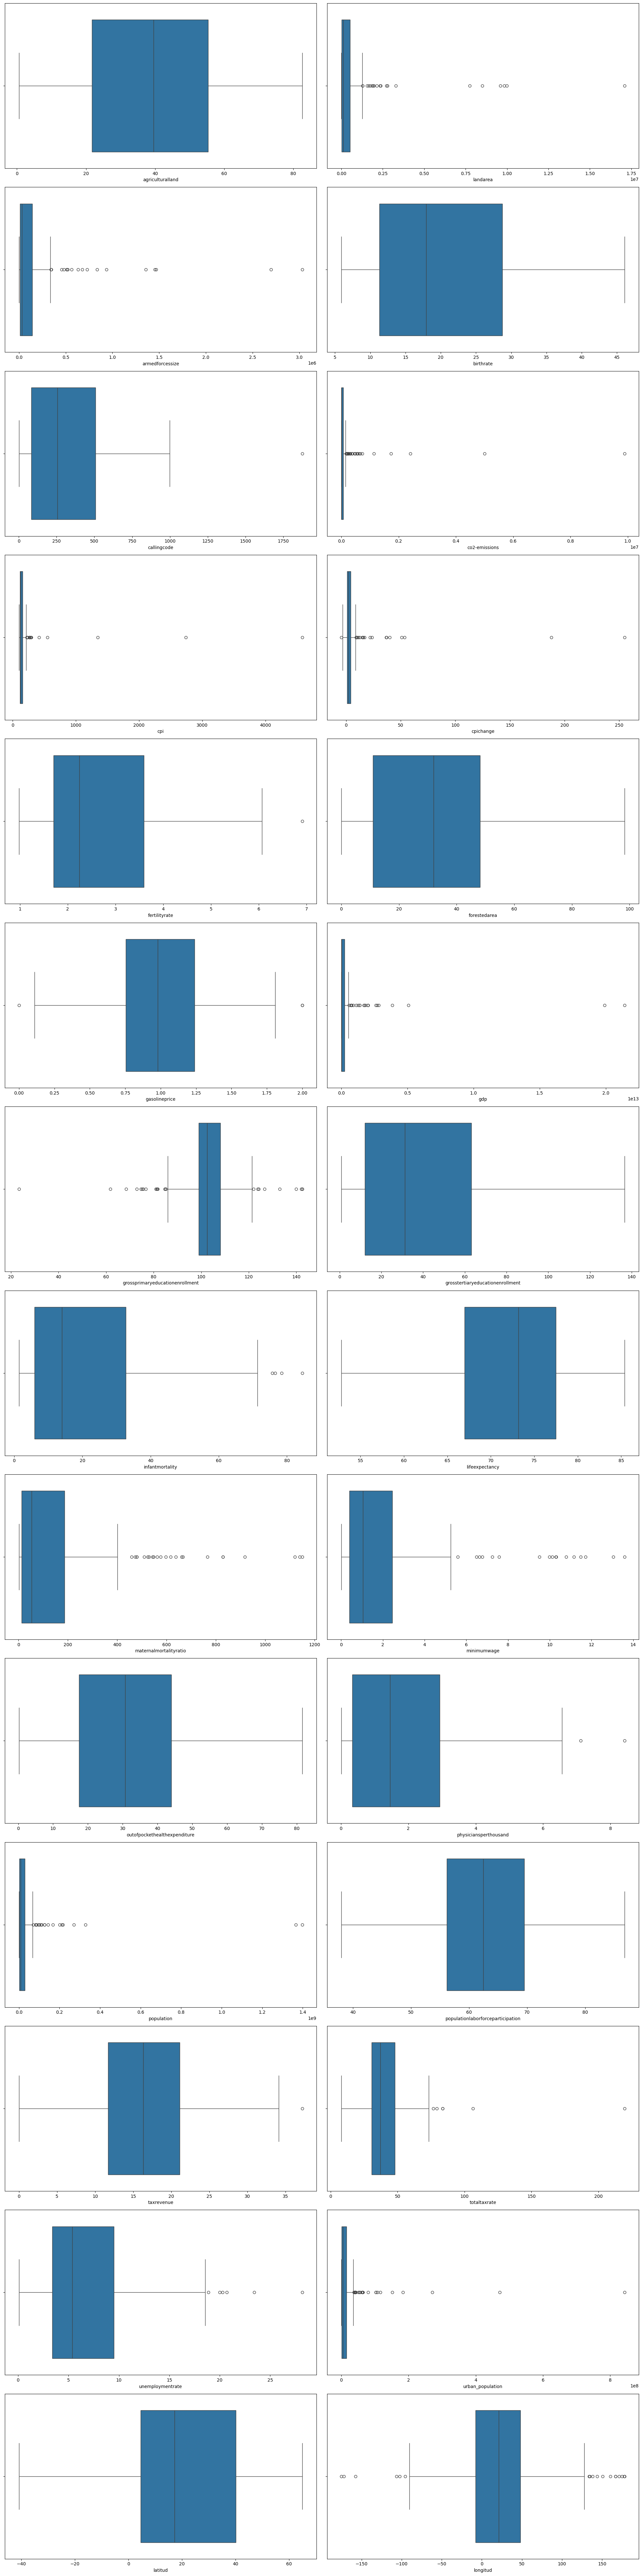

In [46]:
fig, axes = plt.subplots(nrows = 14, ncols = 2, figsize = (20,80)) 

axes = axes.flat

for indice, col in enumerate(nulos_wl_num):
    sns.boxplot(x = col, data = df_wd_total, ax = axes[indice])
    
plt.tight_layout()
#fig.delaxes(axes[-1]); elimina la última gráfica

In [50]:
for columna in nulos_wl_num:
    print(columna)
    print(df_wd_total[columna].describe()[["mean", "50%"]])
    print("--------------")

agriculturalland
mean    39.117553
50%     39.600000
Name: agriculturalland, dtype: float64
--------------
landarea
mean    689624.365979
50%     119511.000000
Name: landarea, dtype: float64
--------------
armedforcessize
mean    159274.853801
50%      31000.000000
Name: armedforcessize, dtype: float64
--------------
birthrate
mean    20.214974
50%     17.950000
Name: birthrate, dtype: float64
--------------
callingcode
mean    360.546392
50%     255.500000
Name: callingcode, dtype: float64
--------------
co2-emissions
mean    177799.239362
50%      12303.000000
Name: co2-emissions, dtype: float64
--------------
cpi
mean    190.460955
50%     125.340000
Name: cpi, dtype: float64
--------------
cpichange
mean    6.722346
50%     2.300000
Name: cpichange, dtype: float64
--------------
fertilityrate
mean    2.698138
50%     2.245000
Name: fertilityrate, dtype: float64
--------------
forestedarea
mean    32.015426
50%     32.000000
Name: forestedarea, dtype: float64
--------------
gasoline

In [51]:
df_wd_total.columns

Index(['index', 'country', 'density', 'abbreviation', 'agriculturalland',
       'landarea', 'armedforcessize', 'birthrate', 'callingcode',
       'capital/majorcity', 'co2-emissions', 'cpi', 'cpichange',
       'currency-code', 'fertilityrate', 'forestedarea', 'gasolineprice',
       'gdp', 'grossprimaryeducationenrollment',
       'grosstertiaryeducationenrollment', 'infantmortality', 'largestcity',
       'lifeexpectancy', 'maternalmortalityratio', 'minimumwage',
       'officiallanguage', 'outofpockethealthexpenditure',
       'physiciansperthousand', 'population',
       'populationlaborforceparticipation', 'taxrevenue', 'totaltaxrate',
       'unemploymentrate', 'urban_population', 'latitud', 'longitud',
       'continent'],
      dtype='object')

In [66]:
columnas_mediana=["agriculturalland","birthrate","callingcode","fertilityrate","forestedarea","gasolineprice","grosstertiaryeducationenrollment","lifeexpectancy","outofpockethealthexpenditure","populationlaborforceparticipation","taxrevenue","latitud"]
columnas_imputer=["landarea","armedforcessize","co2-emissions","cpi","cpichange","gdp","grossprimaryeducationenrollment","infantmortality","maternalmortalityratio","minimumwage","physiciansperthousand","population","totaltaxrate","unemploymentrate","urban_population","longitud"]
columnas_imputer_1=["landarea1","armedforcessize1","co2-emissions1","cpi1","cpichange1","gdp1","grossprimaryeducationenrollment1","infantmortality1","maternalmortalityratio1","minimumwage1","physiciansperthousand1","population1","totaltaxrate1","unemploymentrate1","urban_population1","longitud1"]
columnas_imputer2=["landarea2","armedforcessize2","co2-emissions2","cpi2","cpichange2","gdp2","grossprimaryeducationenrollment2","infantmortality2","maternalmortalityratio2","minimumwage2","physiciansperthousand2","population2","totaltaxrate2","unemploymentrate2","urban_population2","longitud2"]


In [54]:
# la primera columna que gestionaremos sera 'conspriceidx' usando el método 'fillna()' que ya conocemos
# calculamos la media para la columna'
for columna in columnas_mediana:
    mediana = df_wd_total[columna].median()
    print(f"La mediana es: {round(mediana, 2)}")
    
# aplicamos el método 'fillna()' a la columna
    df_wd_total[columna] = df_wd_total[columna].fillna(mediana)

# comprobamos los nulos para la columna
    print(f"Después del 'fillna' tenemos {df_wd_total[columna].isnull().sum()} nulos")

La mediana es: 39.6
Después del 'fillna' tenemos 0 nulos
La mediana es: 17.95
Después del 'fillna' tenemos 0 nulos
La mediana es: 255.5
Después del 'fillna' tenemos 0 nulos
La mediana es: 2.24
Después del 'fillna' tenemos 0 nulos
La mediana es: 32.0
Después del 'fillna' tenemos 0 nulos
La mediana es: 0.98
Después del 'fillna' tenemos 0 nulos
La mediana es: 31.2
Después del 'fillna' tenemos 0 nulos
La mediana es: 73.2
Después del 'fillna' tenemos 0 nulos
La mediana es: 30.7
Después del 'fillna' tenemos 0 nulos
La mediana es: 62.45
Después del 'fillna' tenemos 0 nulos
La mediana es: 16.3
Después del 'fillna' tenemos 0 nulos
La mediana es: 17.27
Después del 'fillna' tenemos 0 nulos


In [67]:
df_wd_total_copia=df_wd_total.copy()
df_wd_total_copia.set_index("index")

,country,density,abbreviation,agriculturalland,landarea,armedforcessize,birthrate,callingcode,capital/majorcity,co2-emissions,cpi,cpichange,currency-code,fertilityrate,forestedarea,gasolineprice,gdp,grossprimaryeducationenrollment,grosstertiaryeducationenrollment,infantmortality,largestcity,lifeexpectancy,maternalmortalityratio,minimumwage,officiallanguage,outofpockethealthexpenditure,physiciansperthousand,population,populationlaborforceparticipation,taxrevenue,totaltaxrate,unemploymentrate,urban_population,latitud,longitud,continent
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Afghanistan,60.0,AF,58.1,652230.0,323000.0,32.49,93.0,Kabul,8672.0,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,38041754.0,48.90,9.3,71.4,11.12,9797273.0,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28748.0,9000.0,11.78,355.0,Tirana,4536.0,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,2854191.0,55.70,18.6,36.6,12.33,1747593.0,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,2381741.0,317000.0,24.28,213.0,Algiers,150006.0,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,43053054.0,41.20,37.2,66.1,11.70,31510100.0,28.033886,1.659626,Africa
3,Andorra,164.0,AD,40.0,468.0,NaN,7.20,376.0,Andorra la Vella,469.0,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,31.2,2.7,Andorra la Vella,73.2,NaN,6.63,Catalan,36.4,3.33,77142.0,62.45,16.3,NaN,NaN,67873.0,42.506285,1.521801,Europe
4,Angola,26.0,AO,47.5,1246700.0,117000.0,40.73,244.0,Luanda,34693.0,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,31825295.0,77.50,9.2,49.1,6.89,21061025.0,-11.202692,17.873887,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32.0,VE,24.5,912050.0,343000.0,17.88,58.0,Caracas,164175.0,2740.27,254.9,VED,2.27,52.7,0.00,4.823593e+11,97.2,79.3,21.4,Caracas,72.1,125.0,0.01,Spanish,45.8,1.92,28515829.0,59.70,16.3,73.3,8.80,25162368.0,6.423750,-66.589730,South America
191,Vietnam,314.0,VN,39.3,331210.0,522000.0,16.75,84.0,Hanoi,192668.0,163.52,2.8,VND,2.05,48.1,0.80,2.619212e+11,110.6,28.5,16.5,Ho Chi Minh City,75.3,43.0,0.73,Vietnamese,43.5,0.82,96462106.0,77.40,19.1,37.6,2.01,35332140.0,14.058324,108.277199,Asia
192,Yemen,56.0,YE,44.6,527968.0,40000.0,30.45,967.0,Sanaa,10609.0,157.58,8.1,YER,3.79,1.0,0.92,2.691440e+10,93.6,10.2,42.9,Sanaa,66.1,164.0,NaN,Arabic,81.0,0.31,29161922.0,38.00,16.3,26.6,12.91,10869523.0,15.552727,48.516388,Asia


In [68]:

# instanciamos la clase del KNNImputer
imputer_knn = KNNImputer(n_neighbors = 5)

# ajustamos y transformamos los datos
imputer_knn_imputado = imputer_knn.fit_transform(df_wd_total_copia[columnas_imputer])

# comprobamos que es lo que nos devuelve, que sigue siendo un array
imputer_knn_imputado

array([[6.5223000e+05, 3.2300000e+05, 8.6720000e+03, ..., 1.1120000e+01,
        9.7972730e+06, 6.7709953e+01],
       [2.8748000e+04, 9.0000000e+03, 4.5360000e+03, ..., 1.2330000e+01,
        1.7475930e+06, 2.0168331e+01],
       [2.3817410e+06, 3.1700000e+05, 1.5000600e+05, ..., 1.1700000e+01,
        3.1510100e+07, 1.6596260e+00],
       ...,
       [5.2796800e+05, 4.0000000e+04, 1.0609000e+04, ..., 1.2910000e+01,
        1.0869523e+07, 4.8516388e+01],
       [7.5261800e+05, 1.6000000e+04, 5.1410000e+03, ..., 1.1430000e+01,
        7.8717130e+06, 2.7849332e+01],
       [3.9075700e+05, 5.1000000e+04, 1.0983000e+04, ..., 4.9500000e+00,
        4.7173050e+06, 2.9154857e+01]])

In [69]:
# por último nos queda añadir ese array al DataFrame como hemos hecho hasta ahora
df_wd_total_copia[columnas_imputer_1] = imputer_knn_imputado


# comprobamos los nulos
print(f"Después del 'KNN' tenemos: \n{df_wd_total_copia[columnas_imputer_1].isnull().sum()} nulos")

Después del 'KNN' tenemos: 
landarea1                           0
armedforcessize1                    0
co2-emissions1                      0
cpi1                                0
cpichange1                          0
gdp1                                0
grossprimaryeducationenrollment1    0
infantmortality1                    0
maternalmortalityratio1             0
minimumwage1                        0
physiciansperthousand1              0
population1                         0
totaltaxrate1                       0
unemploymentrate1                   0
urban_population1                   0
longitud1                           0
dtype: int64 nulos


In [70]:
# hemos dicho que para las tres columnas restantes aplicaremos los dos métodos para luego compararlos, empezaremos por el IterativeImputer
# instanciamos las clases
imputer_iterative = IterativeImputer(max_iter = 20, random_state = 42)

# ajustamos y tranformamos los datos
imputer_iterative_imputado = imputer_iterative.fit_transform(df_wd_total_copia[columnas_imputer])

# comprobamos que es lo que nos devuelve, que en este caso es un array también
imputer_iterative_imputado



array([[6.5223000e+05, 3.2300000e+05, 8.6720000e+03, ..., 1.1120000e+01,
        9.7972730e+06, 6.7709953e+01],
       [2.8748000e+04, 9.0000000e+03, 4.5360000e+03, ..., 1.2330000e+01,
        1.7475930e+06, 2.0168331e+01],
       [2.3817410e+06, 3.1700000e+05, 1.5000600e+05, ..., 1.1700000e+01,
        3.1510100e+07, 1.6596260e+00],
       ...,
       [5.2796800e+05, 4.0000000e+04, 1.0609000e+04, ..., 1.2910000e+01,
        1.0869523e+07, 4.8516388e+01],
       [7.5261800e+05, 1.6000000e+04, 5.1410000e+03, ..., 1.1430000e+01,
        7.8717130e+06, 2.7849332e+01],
       [3.9075700e+05, 5.1000000e+04, 1.0983000e+04, ..., 4.9500000e+00,
        4.7173050e+06, 2.9154857e+01]])

In [71]:
df_wd_total_copia[columnas_imputer2] = imputer_iterative_imputado
# comprobamos los nulos
print(f"Después del 'Iterative' tenemos: \n{df_wd_total_copia[columnas_imputer2].isnull().sum()} nulos")

Después del 'Iterative' tenemos: 
landarea2                           0
armedforcessize2                    0
co2-emissions2                      0
cpi2                                0
cpichange2                          0
gdp2                                0
grossprimaryeducationenrollment2    0
infantmortality2                    0
maternalmortalityratio2             0
minimumwage2                        0
physiciansperthousand2              0
population2                         0
totaltaxrate2                       0
unemploymentrate2                   0
urban_population2                   0
longitud2                           0
dtype: int64 nulos


In [78]:
df_wd_total_copia.describe()[["landarea","landarea1","landarea2","armedforcessize","armedforcessize1","armedforcessize2","co2-emissions","co2-emissions1","co2-emissions2","cpi","cpi1","cpi2","cpichange","cpichange1","cpichange2","gdp","gdp1","gdp2","grossprimaryeducationenrollment","grossprimaryeducationenrollment1","infantmortality1","maternalmortalityratio1","minimumwage1","physiciansperthousand1","population1","totaltaxrate1","unemploymentrate1","urban_population1","longitud1"]]


,landarea,landarea1,landarea2,armedforcessize,armedforcessize1,armedforcessize2,co2-emissions,co2-emissions1,co2-emissions2,cpi,cpi1,cpi2,cpichange,cpichange1,cpichange2,gdp,gdp1,gdp2,grossprimaryeducationenrollment,grossprimaryeducationenrollment1,infantmortality1,maternalmortalityratio1,minimumwage1,physiciansperthousand1,population1,totaltaxrate1,unemploymentrate1,urban_population1,longitud1
count,1.940000e+02,1.950000e+02,1.950000e+02,1.710000e+02,1.950000e+02,1.950000e+02,1.880000e+02,1.950000e+02,1.950000e+02,178.000000,195.000000,195.000000,179.000000,195.000000,195.000000,1.930000e+02,1.950000e+02,1.950000e+02,188.000000,195.000000,195.000000,195.000000,195.000000,195.000000,1.950000e+02,195.000000,195.000000,1.950000e+02,195.000000
mean,6.896244e+05,6.888737e+05,6.896244e+05,1.592749e+05,1.405046e+05,1.458855e+05,1.777992e+05,1.715440e+05,1.709998e+05,190.460955,186.844677,197.667139,6.722346,6.615077,7.119254,4.772959e+11,4.727591e+11,4.753266e+11,102.470213,102.533231,21.536923,163.892308,2.157292,1.828892,3.930265e+07,41.000923,6.989436,2.182471e+07,20.191260
std,1.921609e+06,1.916679e+06,1.916650e+06,3.806288e+05,3.598527e+05,3.581734e+05,8.387903e+05,8.241601e+05,8.243996e+05,397.947380,380.368564,392.722669,24.450414,23.442210,24.061179,2.172173e+12,2.161412e+12,2.161121e+12,13.151607,12.988239,19.403023,229.157488,2.678193,1.668435,1.447221e+08,20.045569,4.872103,7.451573e+07,66.546423
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e+01,1.100000e+01,-5.192515e+04,99.030000,99.030000,-248.000940,-4.300000,-4.300000,-17.480374,4.727146e+07,4.727146e+07,4.727146e+07,23.400000,23.400000,1.400000,2.000000,0.010000,0.010000,8.360000e+02,8.000000,0.090000,5.464000e+03,-175.198242
25%,2.382825e+04,2.445650e+04,2.445650e+04,1.100000e+04,7.000000e+03,1.250000e+04,2.304250e+03,2.033500e+03,2.017000e+03,113.885000,114.415000,113.960000,1.000000,1.000000,1.000000,8.454620e+09,8.285623e+09,8.476801e+09,98.950000,99.130000,6.100000,16.500000,0.505000,0.345000,2.004434e+06,30.900000,3.590000,1.140078e+06,-7.658537
50%,1.195110e+05,1.205380e+05,1.205380e+05,3.100000e+04,2.400000e+04,4.200000e+04,1.230300e+04,1.090200e+04,1.090200e+04,125.340000,127.630000,127.630000,2.300000,2.500000,2.500000,3.438723e+10,3.438723e+10,3.814529e+10,102.550000,102.500000,14.600000,65.000000,1.234000,1.350000,8.877067e+06,37.200000,5.650000,4.418218e+06,20.939444
75%,5.242560e+05,5.356109e+05,5.541675e+05,1.420000e+05,1.230000e+05,1.250000e+05,6.388425e+04,6.194100e+04,6.294550e+04,157.265000,158.450000,166.690000,4.250000,4.750000,5.300000,2.340940e+11,2.304710e+11,2.358901e+11,108.025000,108.050000,32.800000,204.000000,2.616000,2.950000,2.856227e+07,48.600000,9.224000,1.460139e+07,48.046657
max,1.709824e+07,1.709824e+07,1.709824e+07,3.031000e+06,3.031000e+06,3.031000e+06,9.893038e+06,9.893038e+06,9.893038e+06,4583.710000,4583.710000,4583.710000,254.900000,254.900000,254.900000,2.142770e+13,2.142770e+13,2.142770e+13,142.500000,142.500000,84.500000,1150.000000,13.590000,8.420000,1.397715e+09,219.600000,28.180000,8.429340e+08,178.065032


El métodos que elegimos es el KNNImputer porque los valores no se alejan tanto de los valores originales.Hemos hecho una comparación de los dos métodos; KNNImputer y IterativeImputer